Saving upi_transactions (1).csv to upi_transactions (1).csv


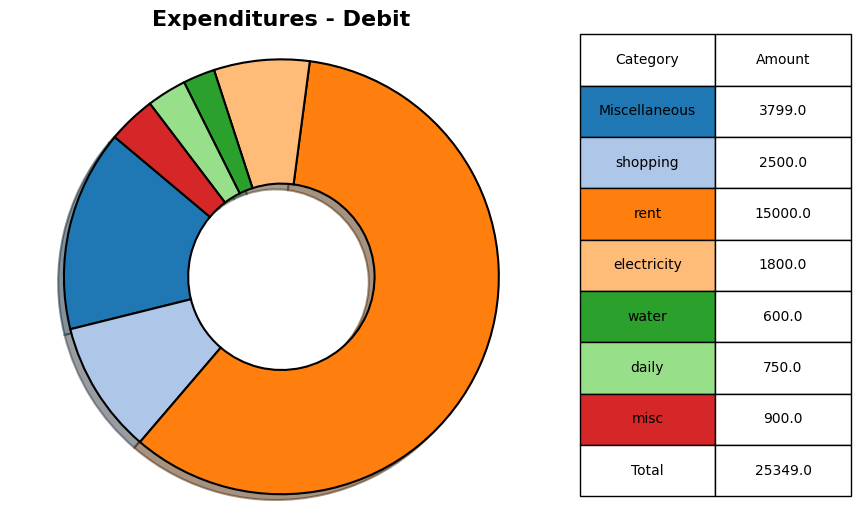

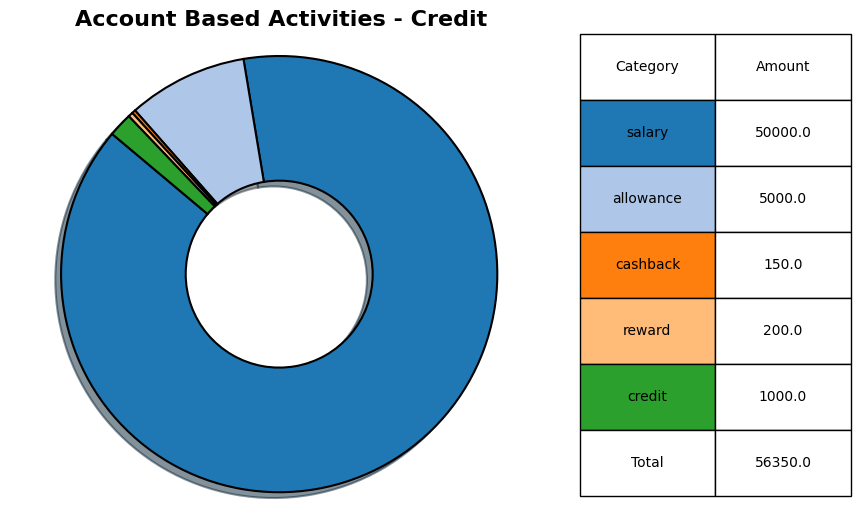

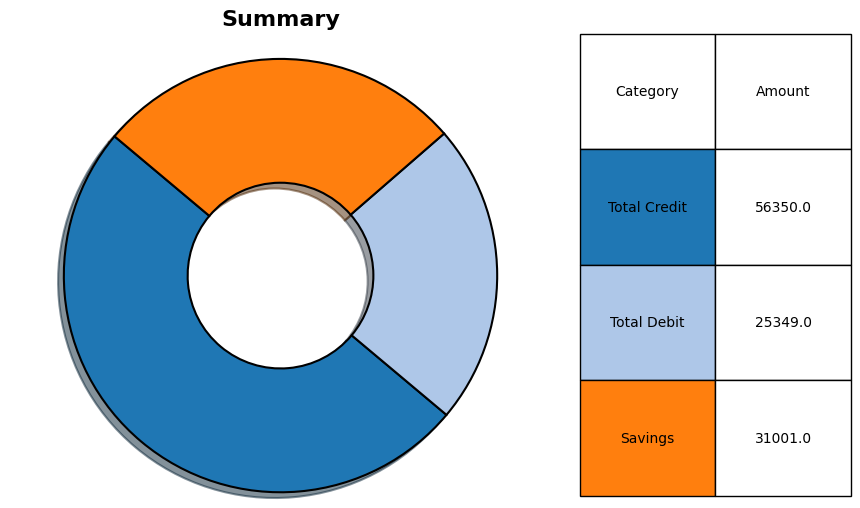

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
# Transaction Classes (Inheritance and Polymorphism)
class Transaction:
    def __init__(self, date, description, amount, type_):
        self.date, self.description, self.amount, self.type_ = date, description, amount, type_

class DebitTransaction(Transaction):
    def __init__(self, date, description, amount):
        super().__init__(date, description, amount, "Debit")

class CreditTransaction(Transaction):
    def __init__(self, date, description, amount):
        super().__init__(date, description, amount, "Credit")

# Finance Analyzer (Encapsulation and Abstraction)

class FinanceAnalyzer:
    def __init__(self):
        self.transactions = []

    def add_transaction(self, t):  # Encapsulation: safe access to transactions list
        self.transactions.append(t)

    def get_summary(self):
        debit = sum(t.amount for t in self.transactions if t.type_=="Debit")
        credit = sum(t.amount for t in self.transactions if t.type_=="Credit")
        return debit, credit, credit - debit

    def categorize(self):
        debit_keywords = ["food","shopping","rent","phone","electricity","water","groceries","daily","misc"]
        credit_keywords = ["salary","allowance","cashback","reward","credit"]
        debit_cat, credit_cat = {}, {}
        for t in self.transactions:
            desc = t.description.lower()
            if t.type_=="Debit":
                cat = next((k for k in debit_keywords if k in desc), "Miscellaneous")
                debit_cat[cat] = debit_cat.get(cat,0)+t.amount
            else:
                cat = next((k for k in credit_keywords if k in desc), "Misc Credits")
                credit_cat[cat] = credit_cat.get(cat,0)+t.amount
        return debit_cat, credit_cat
    def plot_donut(self, data, title, show_total=True):
        colors = sns.color_palette("tab20", len(data)) if len(data)<=20 else sns.color_palette("hls", len(data))
        fig, ax = plt.subplots(figsize=(7,6))
        wedges, _ = ax.pie(
            data.values(),
            labels=None,
            startangle=140,
            colors=colors,
            wedgeprops={"edgecolor":"black","linewidth":1.5,"width":0.6},
            shadow=True,
            explode=[0.02]*len(data)
        )
        for w in wedges: w.set_center((0,-0.05)); w.set_radius(1.05)
        ax.set_title(title, fontsize=16, fontweight='bold'); ax.axis('equal')

        table_data = [[k,v] for k,v in data.items()]
        if show_total:
            table_data.append(["Total", sum(data.values())])
            table_colors = [[colors[i],"white"] for i in range(len(data))]+[["white","white"]]
        else:
            table_colors = [[colors[i],"white"] for i in range(len(data))]

        ax.table(cellText=table_data, cellColours=table_colors,
                 colLabels=["Category","Amount"], cellLoc="center", colLoc="center",
                 loc="right", bbox=[1.05,0,0.5,1], edges='closed')
        plt.show()
    def plot_analysis(self):
        debit, credit, savings = self.get_summary()
        debit_cat, credit_cat = self.categorize()
        self.plot_donut(debit_cat, "Expenditures - Debit", show_total=True)
        self.plot_donut(credit_cat, "Account Based Activities - Credit", show_total=True)
        self.plot_donut({"Total Credit": credit,"Total Debit": debit,"Savings":savings}, "Summary", show_total=False)
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

analyzer = FinanceAnalyzer()
for _, r in df.iterrows():
    t = DebitTransaction(r["Date"], r["Description"], float(r["Amount"])) if str(r["Type"]).strip().lower()=="debit" \
        else CreditTransaction(r["Date"], r["Description"], float(r["Amount"]))
    analyzer.add_transaction(t)

analyzer.plot_analysis()